## Sklearn classification algorithm

### In this notebook we are going to demonstrate the multiclass classification problem
### using minist dataset of handwriten text

In [5]:
import numpy as np
import os
import io
import warnings
import pandas as pd

import  matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV
from pprint import pprint

# for plotting the figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Data loading and spliting

In [6]:
X, y = fetch_openml('mnist_784', version= 1, return_X_y= True)

/home/anni/BS/python_notebook/BS/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
X_copy = X.copy()
y_copy = y.copy()

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [11]:
X = X.to_numpy()
y = y.to_numpy()


In [12]:
target_names = np.unique(y)
print('Number of samples {0} type: {1}'.format(X.shape[0], X.dtype))
print('Number of features is: {0}'.format(X.shape[1]))
print('Min: {0}, Max: {1}'.format(X.min(), X.max()))
print('Number of classes is: {0}, type: {1}'.format(len(target_names), y.dtype))
print('labels is: {0}'.format(target_names))


Number of samples 70000 type: float64
Number of features is: 784
Min: 0.0, Max: 255.0
Number of classes is: 10, type: object
labels is: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [13]:
X = MinMaxScaler().fit_transform(X)
print('Minimum: {0}, Maximum: {1}'.format(np.min(X), np.max(X)))
print('Mean: {0}, Std_dev: {1}'.format(np.mean(X), np.std(X)))
# np.std(X)
# np.mean(X)

Minimum: 0.0, Maximum: 1.0
Mean: 0.13092720382627604, Std_dev: 0.3084510570135976


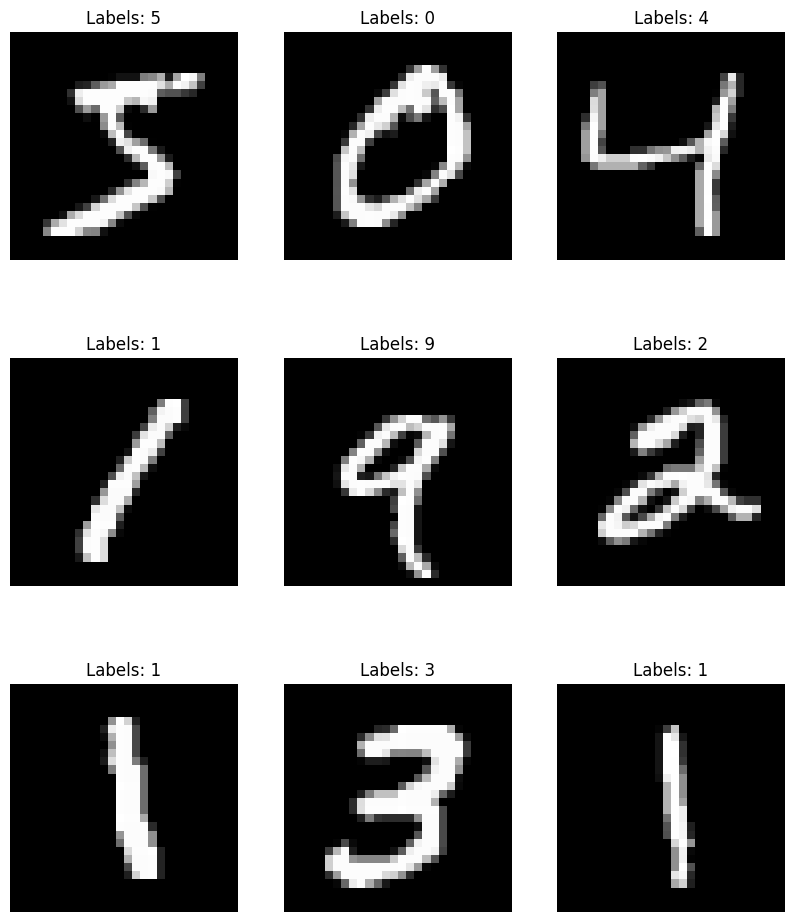

In [14]:
num_images = 9
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows= factor, ncols= factor, figsize= (10,12))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i * (factor)
    for j in range(factor):
        ax[i, j].imshow(X[index+j].reshape(28,28), cmap= 'gray')
        ax[i, j].set_title('Labels: {0}'.format(str(y[index + j])))
        ax[i, j].set_axis_off()


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.5)

Dataset balance check 

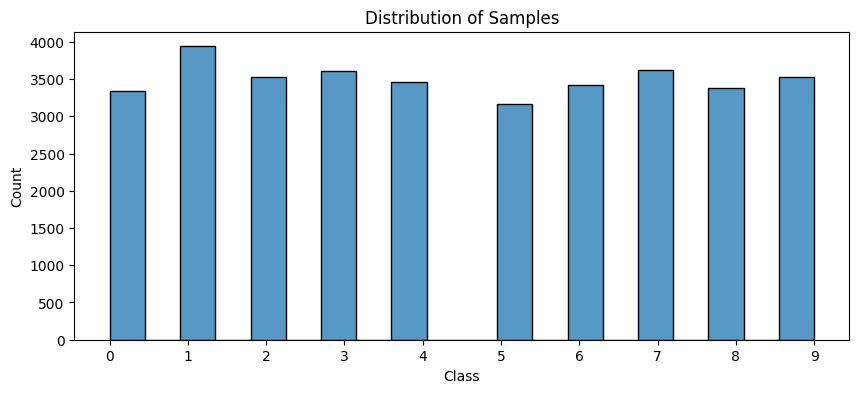

In [16]:
import seaborn as sns

plt.figure(figsize= (10, 4))
sns.histplot(data= np.int8(y_train), binwidth= 0.45, bins= 1)
plt.xticks(ticks= [x for x in range(10)], labels= [x for x in range(10)])
plt.xlabel('Class')
plt.title('Distribution of Samples')
plt.show()

In [17]:
y_train_0 =  np.full((len(y_train)), -1) # we are creating a numpy array with  
y_test_0 = np.full((len(y_test)), -1) # y_train and x_train

index_0 = np.where(y_train == '0') # extracting the indexes of label '0'
y_train_0[index_0] = 1 # assinging the zero label index values with +1 

index_0 = np.where(y_test == '0') # same we are doing with test dataset
y_test_0[index_0] = 1


In [18]:
# now we are going to apply perceptron algorithm using transformed dataset
perceptron = Perceptron(max_iter= 1000, random_state= 1729)

perceptron.fit(x_train, y_train_0)
print('training score of perceptron', perceptron.score(x_train, y_train_0))
print('test score of perceptron', perceptron.score(x_test, y_test_0))

training score of perceptron 0.9866571428571429
test score of perceptron 0.9840571428571429


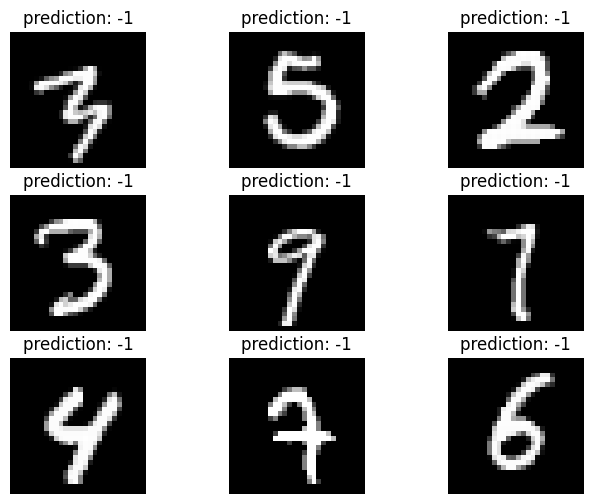

In [19]:
y_hat_test_0 = perceptron.predict(x_test)
num_images = 9
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows= factor, ncols= factor, figsize= (8, 6))
idx_offset = 0

for i in range(factor):
    index = idx_offset + i * factor
    for j in range(factor):
        ax[i, j].imshow(x_test[index + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('prediction: {}'.format(str(y_hat_test_0[index + j])))
        ax[i, j].set_axis_off()


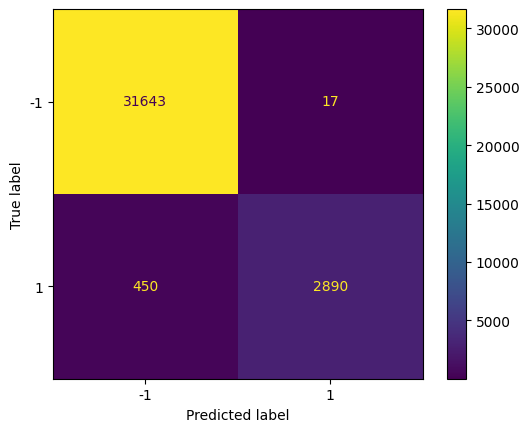

In [20]:
y_train_predict_0 = perceptron.predict(x_train)
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_train_0, y_train_predict_0)
# confusion_matrix.show()

### using cross validation

In [21]:
score_cv = cross_validate(Perceptron(random_state= 1729), x_train, y_train_0, cv= 5,
                                        scoring= ['precision', 'recall', 'f1'],
                                        return_estimator= True,
                                        return_train_score= True,)
print(score_cv)

{'fit_time': array([0.34430218, 0.31372499, 0.32762337, 0.54599929, 0.3324182 ]), 'score_time': array([0.01123047, 0.01274729, 0.0119195 , 0.00981116, 0.01687884]), 'estimator': [Perceptron(random_state=1729), Perceptron(random_state=1729), Perceptron(random_state=1729), Perceptron(random_state=1729), Perceptron(random_state=1729)], 'test_precision': array([0.95267176, 0.94411765, 0.96625767, 0.96835443, 0.94294294]), 'train_precision': array([0.97669087, 0.94605358, 0.97577855, 0.98305737, 0.97589425]), 'test_recall': array([0.93413174, 0.96107784, 0.94311377, 0.91616766, 0.94011976]), 'train_recall': array([0.95658683, 0.97791916, 0.9498503 , 0.95546407, 0.93937126]), 'test_f1': array([0.94331066, 0.95252226, 0.95454545, 0.94153846, 0.94152924]), 'train_f1': array([0.96653432, 0.96172249, 0.96263986, 0.96906434, 0.95728452])}


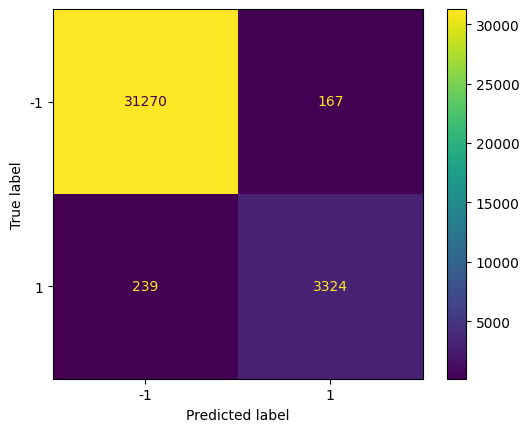

In [22]:
best_perceptron = score_cv['estimator'][0]
y_hat_test_0 = best_perceptron.predict(x_test)
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_test_0)

In [23]:
print('percision %.2f'%precision_score(y_test_0, y_hat_test_0))
print('Recall %.2f'%recall_score(y_test_0, y_hat_test_0))


percision 0.95
Recall 0.93


In [24]:
cf_matrix = confusion_matrix.confusion_matrix
tn = cf_matrix[0, 0]
fn = cf_matrix[1, 0]
fp = cf_matrix[0, 1]
tp = cf_matrix[1, 1]

In [25]:
precision = tp/(tp + fp)
print('precision is:', precision)
recall = tp / (tp + fn)
print('Recall is: ', recall)
f1 = 2/((1/precision) + (1/recall))
print('f1 score is:', f1)
accuracy = (tp + tn)/(tp + tn + fp+ fn)
print('Accuracy is: ', accuracy)

precision is: 0.9521627040962475
Recall is:  0.9329216952006736
f1 score is: 0.9424440034023248
Accuracy is:  0.9884


In [26]:
print(classification_report(y_train_0, y_hat_test_0))

              precision    recall  f1-score   support

          -1       0.90      0.90      0.90     31660
           1       0.09      0.10      0.09      3340

    accuracy                           0.82     35000
   macro avg       0.50      0.50      0.50     35000
weighted avg       0.83      0.82      0.82     35000



<Axes: ylabel='Count'>

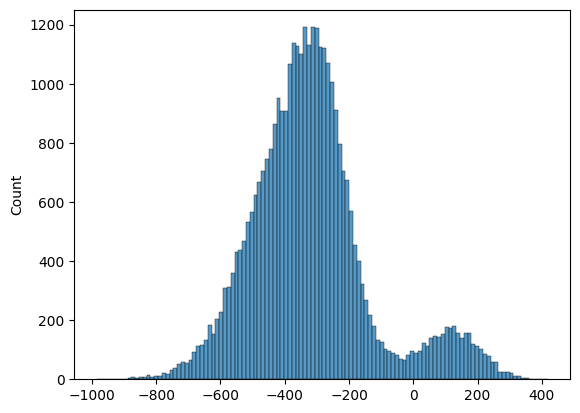

In [27]:
perceptron = Perceptron(random_state= 1729)
perceptron.fit(x_train, y_train_0)
y_score = perceptron.decision_function(x_train)
sns.histplot(np.sort(y_score))


In [28]:
precision, recalls, thresholds = precision_recall_curve(y_train_0, y_score, pos_label= 1)

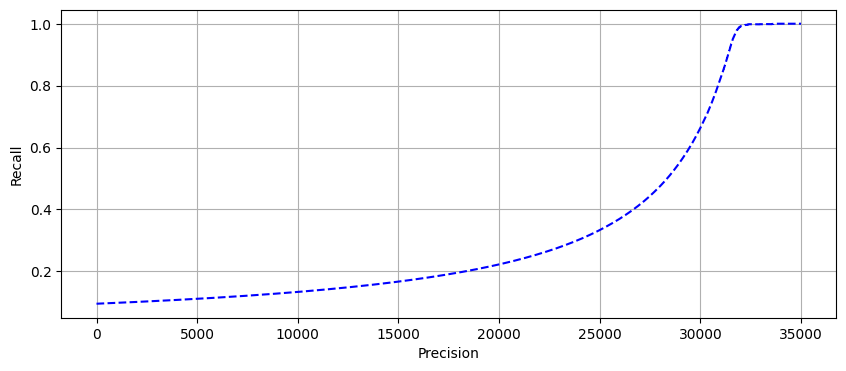

In [29]:
plt.figure(figsize= (10, 4))
plt.plot(precision[:-1], 'b--', label= 'Percision')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

In [30]:
?plt.axis

Signature:
plt.axis(
    arg: 'tuple[float, float, float, float] | bool | str | None' = None,
    /,
    *,
    emit: 'bool' = True,
    **kwargs,
) -> 'tuple[float, float, float, float]'
Docstring:
Convenience method to get or set some axis properties.

Call signatures::

  xmin, xmax, ymin, ymax = axis()
  xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
  xmin, xmax, ymin, ymax = axis(option)
  xmin, xmax, ymin, ymax = axis(**kwargs)

Parameters
----------
xmin, xmax, ymin, ymax : float, optional
    The axis limits to be set.  This can also be achieved using ::

        ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

option : bool or str
    If a bool, turns axis lines and labels on or off. If a string,
    possible values are:

    ================ ===========================================================
    Value            Description
    ================ ===========================================================
    'off' or `False` Hide all axis decorations, i.e. axis

<class 'tuple'> (-1054.4618785082669, 488.9869534794304, -0.049685628742514976, 1.0499850299401197)


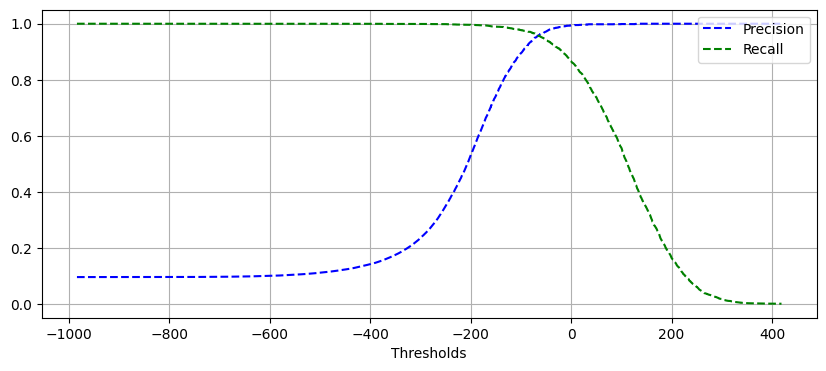

In [31]:
plt.figure(figsize= (10, 4))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
ax = plt.axis()
print(type(ax), ax)
plt.xlabel('Thresholds')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

## Multiclass Classifier(OneVsAll)

* we know that the perceptron is a binary classifier. However MNIST dataset contain 10 classes.
* Solution combin multiple binary classifiers and devise a suitable scoring matrics

In [32]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelBinarizer

In [33]:
perceptron = Perceptron(random_state= 1729)
y_train_ovr  = LabelBinarizer().fit_transform(y_train)
for i in range(10):
  print('{0}:{1}'.format(y_train[i], y_train_ovr[i]))

6:[0 0 0 0 0 0 1 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]
7:[0 0 0 0 0 0 0 1 0 0]
5:[0 0 0 0 0 1 0 0 0 0]
6:[0 0 0 0 0 0 1 0 0 0]
0:[1 0 0 0 0 0 0 0 0 0]
8:[0 0 0 0 0 0 0 0 1 0]
7:[0 0 0 0 0 0 0 1 0 0]
4:[0 0 0 0 1 0 0 0 0 0]
3:[0 0 0 1 0 0 0 0 0 0]


In [34]:
perceptron.fit(x_train, y_train)

Perceptron(random_state=1729)

In [37]:
scores = perceptron.decision_function(x_train[6].reshape(1, -1))
pprint(scores)
print('The predicted class:', np.argmax(scores))

array([[-178.30128412, -164.92341407, -177.58663591, -302.09388697,
        -224.89739331,  -59.15092657, -509.77147251, -360.89333333,
         -20.75557093, -317.19224913]])
The predicted class: 8


In [38]:
y_pred = perceptron.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3340
           1       0.93      0.98      0.96      3938
           2       0.88      0.90      0.89      3527
           3       0.95      0.81      0.87      3613
           4       0.85      0.96      0.90      3465
           5       0.81      0.89      0.85      3159
           6       0.92      0.96      0.94      3423
           7       0.91      0.93      0.92      3625
           8       0.89      0.82      0.86      3380
           9       0.92      0.81      0.86      3530

    accuracy                           0.90     35000
   macro avg       0.90      0.90      0.90     35000
weighted avg       0.91      0.90      0.90     35000



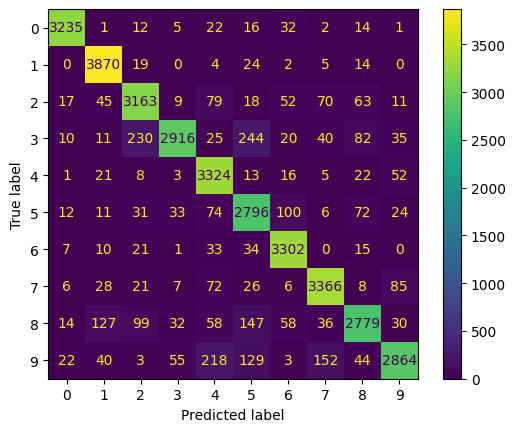

In [39]:
confusion_display = ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

## Iteration vs loss function

In [ ]:
steps =[
  ('scaler', MinMaxScaler()),
  ('bin_clf', Perceptron())
]
pipe = Pipeline(steps=steps)
pipe.fit(x_train)

In [ ]:
# iteration = 100
# bin_clf1 = Perceptron(max_iter= 1000, random_state= 2094)
# loss_clf1 = []
# for i in range(iteration):
#   bin_clf1.partial_fit(x_train, y_train_)